# Imports

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from IPython.display import HTML

# Loading data

In [7]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


In [8]:
countries[countries['population'] > 30]

,area,capital,country,population
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
4,244820,London,United Kingdom,64.9


# Pivoting

In [9]:
countries = countries.set_index('country')
countries

,area,capital,population
country,,,
Belgium,30510,Brussels,11.3
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9
United Kingdom,244820,London,64.9


# Calculate Density


In [10]:
countries['density'] = countries['population'] * 10**6 / countries['area']
countries

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,11.3,370.370370
France,671308,Paris,64.3,95.783158
Germany,357050,Berlin,81.3,227.699202
Netherlands,41526,Amsterdam,16.9,406.973944
United Kingdom,244820,London,64.9,265.092721


In [11]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Belgium to United Kingdom
Data columns (total 4 columns):
area          5 non-null int64
capital       5 non-null object
population    5 non-null float64
density       5 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 200.0+ bytes


In [12]:
countries.sort_values(by='density', ascending=False)

,area,capital,population,density
country,,,,
Netherlands,41526,Amsterdam,16.9,406.973944
Belgium,30510,Brussels,11.3,370.370370
United Kingdom,244820,London,64.9,265.092721
Germany,357050,Berlin,81.3,227.699202
France,671308,Paris,64.3,95.783158


# Built in descritive analysis

In [13]:
countries.describe()

,area,population,density
count,5.000000,5.000000,5.000000
mean,269042.800000,47.740000,273.183879
std,264012.827994,31.519645,123.440607
min,30510.000000,11.300000,95.783158
25%,41526.000000,16.900000,227.699202
50%,244820.000000,64.300000,265.092721
75%,357050.000000,64.900000,370.370370
max,671308.000000,81.300000,406.973944


# Plotting

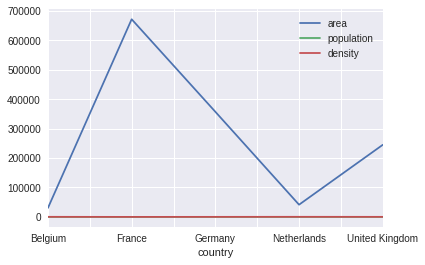

In [14]:
countries.plot() # Pretty lame...

## MatplotLib Plot types
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot

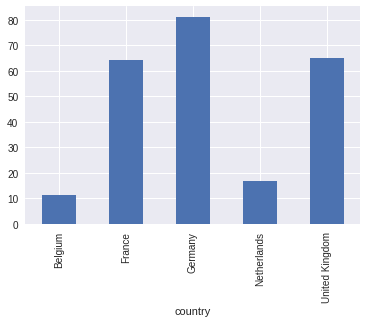

In [15]:
countries['population'].plot(kind='bar')

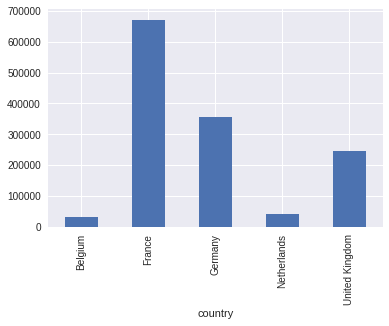

In [16]:
countries['area'].plot(kind='bar')

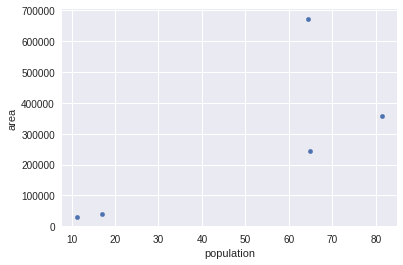

In [17]:
countries.plot(kind='scatter', x='population', y='area')

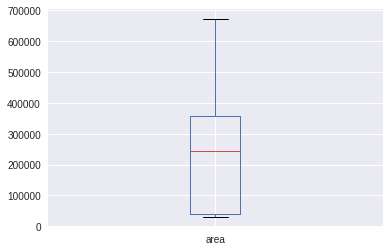

In [18]:
countries[['area']].plot(kind='box')

# Indexing

In [25]:
countries.index

Index(['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'], dtype='object', name='country')

In [26]:
countries.columns

Index(['area', 'capital', 'population', 'density'], dtype='object')

# Loc and iloc
Loc allows to index rows by values

In [28]:
countries.loc['Netherlands']

area              41526
capital       Amsterdam
population         16.9
density         406.974
Name: Netherlands, dtype: object

In [29]:
countries.loc['Germany', 'area']

357050

In [30]:
countries.loc['France': 'Netherlands', ['capital', 'density']].sort_values(by='density')

,capital,density
country,,
France,Paris,95.783158
Germany,Berlin,227.699202
Netherlands,Amsterdam,406.973944


In [31]:
countries.loc[countries['density']>300, ['capital', 'population']]

,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


iloc works the same as loc, but with numeric indexes

In [32]:
countries.iloc[0:2,1:3]

,capital,population
country,,
Belgium,Brussels,11.3
France,Paris,64.3


# Embedding HTML

In [33]:
HTML('<iframe src=http://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8#tab-data-by-country width=700 height=350></iframe>')

# Pivoting

In [36]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 
                   'B':['a', 'b', 'a', 'b'], 
                   'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [37]:
df = df.set_index(['A', 'B'])
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

## Various indexes 

In [38]:
df.loc[('two', 'a')]

C    2
Name: (two, a), dtype: int64

In [39]:
result = df['C'].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


In [42]:
result.index

Index(['one', 'two'], dtype='object', name='A')

In [44]:
df = result.stack().reset_index(name='C')
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [45]:
df.pivot(index='A', columns='B', values='C')

B,a,b
A,,
one,0,1
two,2,3


In [47]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two', 'one', 'two'], 'B':['a', 'b', 'a', 'b', 'a', 'b'], 'C':range(6)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3
4,one,a,4
5,two,b,5


In [48]:
df.pivot_table(index='A', columns='B', values='C', aggfunc='count') #'mean'

B,a,b
A,,
one,2,1
two,1,2


# Reading Greece Air Pollution CSV

In [52]:
colnames = ['date'] + [item for pair in zip(["{:02d}".format(i) for i in range(24)], ['flag']*24) for item in pair]
pol_data = pd.read_csv('data/GR0230A0000700100hour8.1-1-2009.31-12-2011', 
                       sep="\t", 
                       header=None, 
                       na_values=[-999, -9999], 
                       names=colnames)
pol_data.head()

,date,00,flag,01,flag.1,02,flag.2,03,flag.3,04,...,19,flag.19,20,flag.20,21,flag.21,22,flag.22,23,flag.23
0,2009-01-01,24.000,0,25.500,0,26.000,0,25.750,0,25.600,...,24.125,1,24.125,1,23.625,1,23.500,1,22.875,1
1,2009-01-02,23.875,1,24.000,1,24.750,1,24.000,1,24.000,...,25.750,1,26.000,1,25.750,1,25.375,1,25.000,1
2,2009-01-03,24.375,1,23.750,1,22.625,1,22.875,1,22.125,...,24.500,1,25.000,1,26.000,1,26.125,1,26.625,1
3,2009-01-04,26.875,1,27.125,1,26.750,1,25.875,1,25.125,...,23.375,1,23.125,1,23.125,1,23.750,1,24.250,1
4,2009-01-05,26.125,1,25.750,1,26.625,1,24.750,1,24.750,...,24.250,1,22.875,1,24.000,1,24.625,1,23.625,1


In [53]:
pol_data = pol_data.drop('flag', axis=1)
pol_data.head()

,date,00,01,flag.1,02,flag.2,03,flag.3,04,flag.4,...,19,flag.19,20,flag.20,21,flag.21,22,flag.22,23,flag.23
0,2009-01-01,24.000,25.500,0,26.000,0,25.750,0,25.600,0,...,24.125,1,24.125,1,23.625,1,23.500,1,22.875,1
1,2009-01-02,23.875,24.000,1,24.750,1,24.000,1,24.000,1,...,25.750,1,26.000,1,25.750,1,25.375,1,25.000,1
2,2009-01-03,24.375,23.750,1,22.625,1,22.875,1,22.125,1,...,24.500,1,25.000,1,26.000,1,26.125,1,26.625,1
3,2009-01-04,26.875,27.125,1,26.750,1,25.875,1,25.125,1,...,23.375,1,23.125,1,23.125,1,23.750,1,24.250,1
4,2009-01-05,26.125,25.750,1,26.625,1,24.750,1,24.750,1,...,24.250,1,22.875,1,24.000,1,24.625,1,23.625,1


In [54]:
pol_data = pol_data.set_index('date')
pol_data.head()

,00,01,flag.1,02,flag.2,03,flag.3,04,flag.4,05,...,19,flag.19,20,flag.20,21,flag.21,22,flag.22,23,flag.23
date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,24.000,25.500,0,26.000,0,25.750,0,25.600,0,25.00,...,24.125,1,24.125,1,23.625,1,23.500,1,22.875,1
2009-01-02,23.875,24.000,1,24.750,1,24.000,1,24.000,1,23.50,...,25.750,1,26.000,1,25.750,1,25.375,1,25.000,1
2009-01-03,24.375,23.750,1,22.625,1,22.875,1,22.125,1,21.75,...,24.500,1,25.000,1,26.000,1,26.125,1,26.625,1
2009-01-04,26.875,27.125,1,26.750,1,25.875,1,25.125,1,24.50,...,23.375,1,23.125,1,23.125,1,23.750,1,24.250,1
2009-01-05,26.125,25.750,1,26.625,1,24.750,1,24.750,1,25.50,...,24.250,1,22.875,1,24.000,1,24.625,1,23.625,1


In [63]:
pol_data_stacked = pol_data.stack()
pol_data_stacked

date               
2009-01-01  00         24.000
            01         25.500
            flag.1      0.000
            02         26.000
            flag.2      0.000
            03         25.750
            flag.3      0.000
            04         25.600
            flag.4      0.000
            05         25.000
            flag.5      1.000
            06         24.857
            flag.6      1.000
            07         25.250
            flag.7      1.000
            08         25.500
            flag.8      1.000
            09         25.500
            flag.9      1.000
            10         24.750
            flag.10     1.000
            11         24.500
            flag.11     1.000
            12         24.875
            flag.12     1.000
            13         25.625
            flag.13     1.000
            14         25.500
            flag.14     1.000
            15         25.250
                        ...  
2011-12-31  09          0.000
            flag.9  

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'MultiIndex'